# Analysis: Teachers to Students Ratio

Author: Tom Freudenmann
Date: 2024-12-01
Tags: Teachers, Students, Ratio, Analysis
Summary: This is the analysis of the teachers to students ratio in Germany.


In [179]:
from school_analysis.preprocessing.load import Loader
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import school_analysis as sa
from tabulate import tabulate
from tueplots.constants.color import rgb

loader = Loader()
students_per_state = loader.load('school-children-by-state')
students_per_type = loader.load('school-children-by-type')
teachers = loader.load('teachers-per-schooltype')
zensus = loader.load('zensus')

# 1. Understanding data structure and validate downloaded data

This section is used to look deeper into the data structure, validate the data and to get a better understanding of what to plot later.

## 1.1 Students per state
First we want to have a look at the students per state and the structure of the data to understand what data is used.

In [180]:
def describe_counts(df, cols):
    """Pretty print the value counts of a dataframe"""
    value_counts = {}
    for c in cols:
        v_counts = df[c].value_counts()
        value_counts[c] = v_counts.keys().tolist()
        value_counts[c + "_count"] = v_counts.values.tolist()
        
    print(tabulate(value_counts, headers='keys'))
    
def analyse_structure(df, cols = None):
    """Analyse the structure of a dataframe"""
    print("Shape: ", df.shape)
    print("Columns: ", df.columns)
    print("Data types:\n", df.dtypes, "\n")
    print("Missing values:\n", df.isnull().sum(), "\n")
    print("Unique values:\n", df.nunique(), "\n")
    print("Value counts: ")
    describe_counts(df, df.columns) if cols is None else describe_counts(df, cols)

def analyse_min_max(df, col="Value"):
    most_students = df.loc[df[col].idxmax()]
    least_students = df.loc[df[col].idxmin()]

    # Print some stats as a table
    print("Highest {}: \n{}".format(col, most_students))
    print("-" * 100)
    print("Lowest {}: \n{}".format(col, least_students))
    print("-" * 100)

# Todo: Move this to the framework

In [181]:
# Specify Analysis
analyse_min_max(students_per_state, "Value")

Highest Value: 
Federal State    Nordrhein-Westfalen
Gender                           all
Type                          Pupils
Value                      2338855.0
Year                            2003
Name: 2280, dtype: object
----------------------------------------------------------------------------------------------------
Lowest Value: 
Federal State              Bremen
Gender                          f
Type             School beginners
Value                      2437.0
Year                         2008
Name: 1048, dtype: object
----------------------------------------------------------------------------------------------------


In [182]:
# General Analysis
analyse_structure(students_per_state, ["Federal State", "Gender", "Year", "Type"])

Shape:  (3600, 5)
Columns:  Index(['Federal State', 'Gender', 'Type', 'Value', 'Year'], dtype='object')
Data types:
 Federal State     object
Gender            object
Type              object
Value            float64
Year               int64
dtype: object 

Missing values:
 Federal State     0
Gender            0
Type              0
Value            99
Year              0
dtype: int64 

Unique values:
 Federal State      16
Gender              3
Type                3
Value            3441
Year               25
dtype: int64 

Value counts: 
Federal State             Federal State_count  Gender      Gender_count    Year    Year_count  Type                                       Type_count
----------------------  ---------------------  --------  --------------  ------  ------------  ---------------------------------------  ------------
Baden-Württemberg                         225  m                   1200    1998           144  Pupils                                           1200
Bayern 

As we can see the counts are always the same, but there are less 'all' genders and less results in the year 2022. ==> Maybe the data is not complete.

Trying now to get all year, school combinations in which the gender all doesn't exist.

In [183]:
students_per_state.groupby(["Federal State", "Type", "Year"]).apply(lambda x: len(x["Gender"].value_counts().values.tolist()) != 3).loc[lambda x: x == True]

Series([], dtype: bool)

It seems like the preprocessing is broken, because there are no results for the year 2022. So we have to fix this. (You may now see the corrected results in the table above.)

## 1.2 Students per school type
Now we want to have a look at the students per school type and the structure of the data to understand what data is used.

In [184]:
analyse_min_max(students_per_type, "Value")

Highest Value: 
School Type         Grammar schools (9 years of schooling)
Certificate Type                                     Total
Gender                                               Total
Value                                             268984.0
Year                                                  2006
Name: 2369, dtype: object
----------------------------------------------------------------------------------------------------
Lowest Value: 
School Type                                           Special schools
Certificate Type    Entrance qualification for univ. of appl. scie...
Gender                                                         Female
Value                                                             1.0
Year                                                             1997
Name: 139, dtype: object
----------------------------------------------------------------------------------------------------


In [185]:
# General Analysis
analyse_structure(students_per_type, ["Certificate Type", "Gender", "Year", "School Type"])

Shape:  (5850, 5)
Columns:  Index(['School Type', 'Certificate Type', 'Gender', 'Value', 'Year'], dtype='object')
Data types:
 School Type          object
Certificate Type     object
Gender               object
Value               float64
Year                  int64
dtype: object 

Missing values:
 School Type            0
Certificate Type       0
Gender                 0
Value               1491
Year                   0
dtype: int64 

Unique values:
 School Type           13
Certificate Type       6
Gender                 3
Value               3294
Year                  25
dtype: int64 

Value counts: 
Certificate Type                                      Certificate Type_count  Gender      Gender_count    Year    Year_count  School Type                                  School Type_count
--------------------------------------------------  ------------------------  --------  --------------  ------  ------------  -----------------------------------------  -------------------
Without sec

Again it can be seen, that there are some data missing for `Entrance qualification for universities of applied sciences`, `Total` and `University entrance qualification`. So we have to fix this. (You may now see the corrected results in the table above.)

## 1.3 Teachers per state
Now we want to have a look at the teachers per state and the structure of the data to understand what data is used.

In [186]:
teachers.columns

Index(['School Type', 'Contract Type', 'Federal State', 'Gender', 'Year',
       'Number of Teachers'],
      dtype='object')

In [187]:
analyse_min_max(teachers, "Number of Teachers")

Highest Number of Teachers: 
School Type                              Grundschulen
Contract Type         Vollzeitbeschäftigte Lehrkräfte
Federal State                             Deutschland
Gender                                              z
Year                                             1992
Number of Teachers                           119355.0
Name: 1871, dtype: object
----------------------------------------------------------------------------------------------------
Lowest Number of Teachers: 
School Type                          Abendrealschulen
Contract Type         Vollzeitbeschäftigte Lehrkräfte
Federal State                       Baden-Württemberg
Gender                                              z
Year                                             1992
Number of Teachers                                0.0
Name: 27, dtype: object
----------------------------------------------------------------------------------------------------


In [188]:
analyse_structure(teachers, ["School Type", "Contract Type", "Federal State", "Gender", "Year"])

Shape:  (58261, 6)
Columns:  Index(['School Type', 'Contract Type', 'Federal State', 'Gender', 'Year',
       'Number of Teachers'],
      dtype='object')
Data types:
 School Type            object
Contract Type          object
Federal State          object
Gender                 object
Year                    int64
Number of Teachers    float64
dtype: object 

Missing values:
 School Type           0
Contract Type         0
Federal State         0
Gender                0
Year                  0
Number of Teachers    0
dtype: int64 

Unique values:
 School Type             21
Contract Type            3
Federal State           17
Gender                   3
Year                    29
Number of Teachers    9205
dtype: int64 

Value counts: 
School Type                                  School Type_count  Contract Type                           Contract Type_count  Federal State             Federal State_count  Gender      Gender_count    Year    Year_count
---------------------------------

Since every year appears the same amount of times, we can assume that the data is complete. We can also see that there are differences in the school types of the federal states, because they have different school systems.

## 1.4 Zensus
Now we want to have a look at the zensus data and the structure of the data to understand what data is used.

In [189]:
analyse_min_max(zensus, "Value")

Highest Value: 
Year                            2022
Gender                           all
Value                       18139116
Federal State    Nordrhein-Westfalen
Name: 1325, dtype: object
----------------------------------------------------------------------------------------------------
Lowest Value: 
Year               2011
Gender                m
Value            317060
Federal State    Bremen
Name: 780, dtype: object
----------------------------------------------------------------------------------------------------


In [190]:
analyse_structure(zensus, ["Federal State", "Gender", "Year"])

Shape:  (1344, 4)
Columns:  Index(['Year', 'Gender', 'Value', 'Federal State'], dtype='object')
Data types:
 Year              int64
Gender           object
Value             int64
Federal State    object
dtype: object 

Missing values:
 Year             0
Gender           0
Value            0
Federal State    0
dtype: int64 

Unique values:
 Year               28
Gender              3
Value            1344
Federal State      16
dtype: int64 

Value counts: 
Federal State             Federal State_count  Gender      Gender_count    Year    Year_count
----------------------  ---------------------  --------  --------------  ------  ------------
Baden-Württemberg                          84  m                    448    1995            48
Bayern                                     84  f                    448    1996            48
Berlin                                     84  all                  448    2021            48
Brandenburg                                84                      

Seems like the data is complete.

## 2. Plotting the data
In this section we want to plot the data to get a better understanding of the data. Foreach data set we want to plot the following:
  - Evolution over time
  - Comparison of the federal states
  - Comparison of the school types
  - Comparison of the school types in the federal states
  
Then we want to compare the teachers to students ratio of the federal states and the school types.

### 2.1 Students per state
#### 2.1.1 Evolution over time

In [191]:
students_per_state = pd.merge(students_per_state, zensus, how="inner", on=["Federal State", "Gender", "Year"], suffixes=("_students", "_zensus"))
students_per_state = students_per_state.rename(columns={"Value_students": "Students", "Value_zensus": "Percentage"})
students_per_state["Percentage"] = (students_per_state["Students"] / students_per_state["Percentage"]) * 100

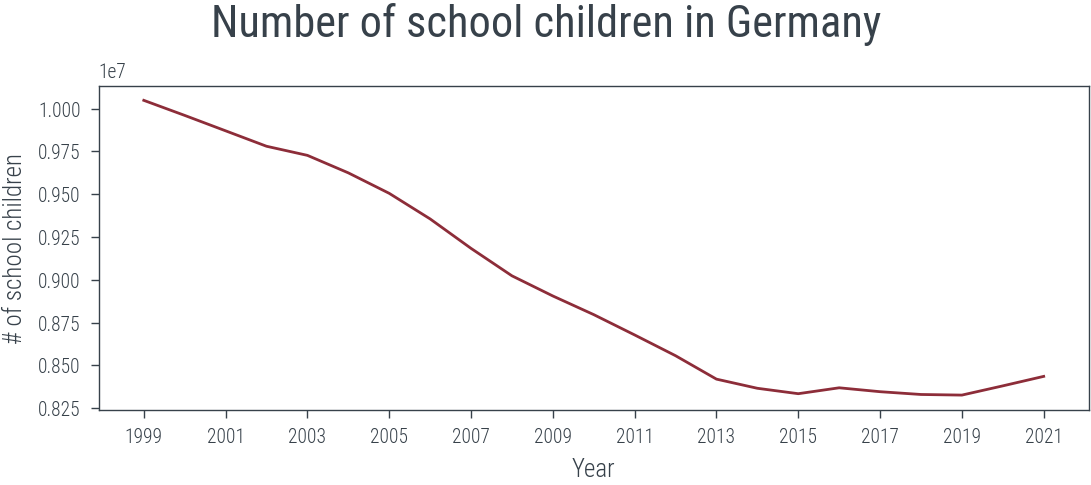

In [192]:
# Plot the data
fig, ax = plt.subplots(1, 1)


aggregated = students_per_state.groupby(["Year", "Gender", "Type"]).apply(lambda x: x["Students"].sum()).reset_index()
aggregated = aggregated[aggregated["Year"] >= 1999].loc[aggregated["Year"] <= 2021]
aggregated.rename(columns={0: "Students"}, inplace=True)

all = aggregated.loc[aggregated["Gender"] == "all"]

ax.plot(all[all["Type"] == "Pupils"]["Year"], all[all["Type"] == "Pupils"]["Students"])

ax.set_xlabel("Year")
ax.set_ylabel("# of school children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))

# Other settings
fig.suptitle("Number of school children in Germany", fontsize=16)

plt.show()

We can see that the number of students has long been decreasing, but since 2019 it is heavily increasing again.

We can also plot the ration of leavers and new students to see if the number of students is increasing because of more new students or less leavers.

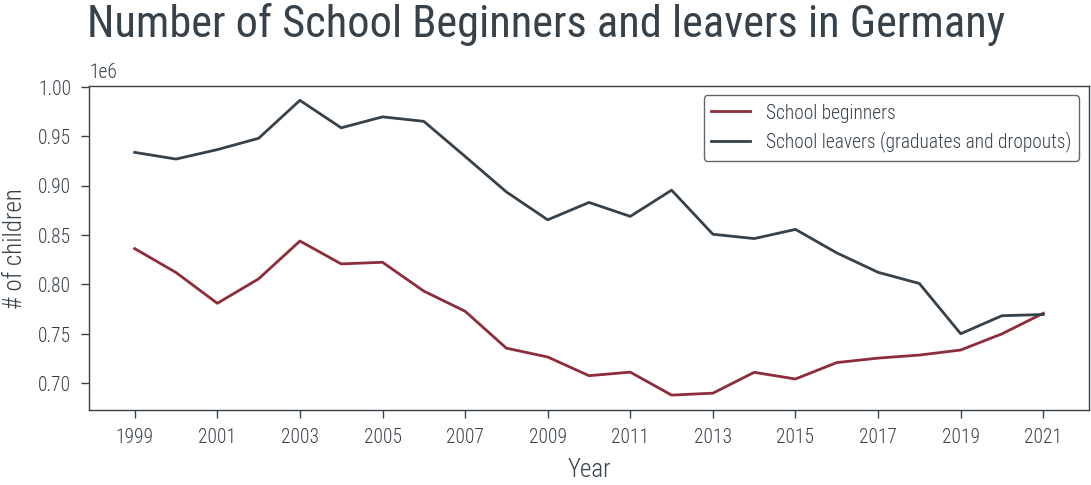

In [193]:
# Plot the data
fig, ax = plt.subplots(1, 1)

aggregated = students_per_state.groupby(["Year", "Gender", "Type"]).apply(lambda x: x["Students"].sum()).reset_index()
aggregated = aggregated[aggregated["Year"] >= 1999].loc[aggregated["Year"] <= 2021]
aggregated.rename(columns={0: "Students"}, inplace=True)

all = aggregated.loc[aggregated["Gender"] == "all"]
# Drop year 2022 because it is incomplete

ax.plot(all[all["Type"] == "School beginners"]["Year"], all[all["Type"] == "School beginners"]["Students"])
ax.plot(all[all["Type"] == "School leavers (graduates and dropouts)"]["Year"], all[all["Type"] == "School leavers (graduates and dropouts)"]["Students"])


ax.set_xlabel("Year")
ax.set_ylabel("# of children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))
ax.legend(["School beginners", "School leavers (graduates and dropouts)"])

# Other settings
fig.suptitle("Number of School Beginners and leavers in Germany", fontsize=16)

plt.show()

It can be seen that the number of school beginners increases since 2012 and the number of leavers decreases until 2019. Since 2019 the number of leavers is increasing again, resulting in the increase of the number of students.

#### 2.1.2 Comparison of the federal states

/tmp/ipykernel_45094/3692718627.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


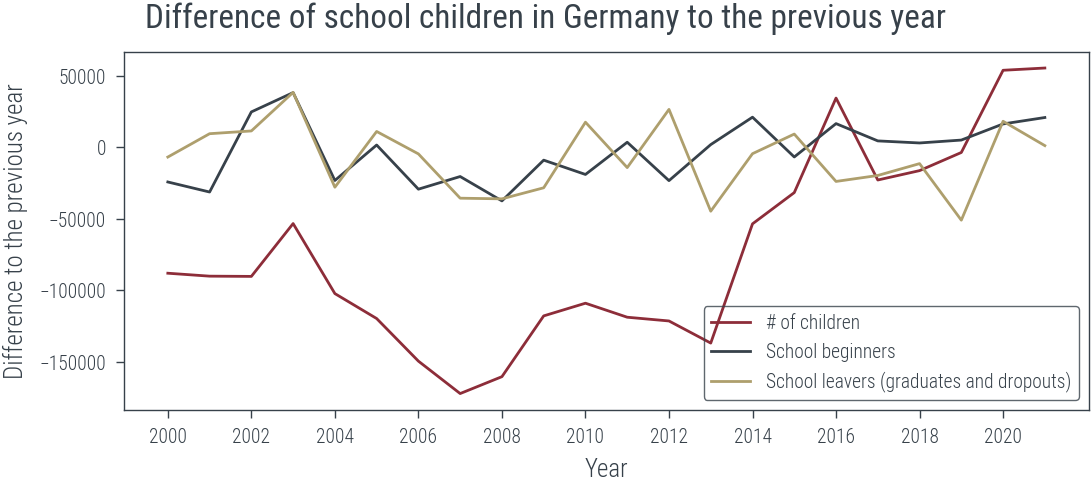

In [194]:
# Number compared to the last year
fig, ax = plt.subplots(1, 1)

aggregated = students_per_state.groupby(["Year", "Gender", "Type"]).apply(lambda x: x["Students"].sum()).reset_index()
aggregated = aggregated[aggregated["Year"] >= 1999].loc[aggregated["Year"] <= 2021]
aggregated = aggregated.rename(columns={0: "Students"})

diff_year = aggregated.copy()
for i in range(diff_year["Year"].min(), diff_year["Year"].max() + 1):
    if i == diff_year["Year"].min():
        diff_year.loc[diff_year["Year"] == i, "diff"] = np.nan
        continue
    diff_year.loc[diff_year["Year"] == i, "diff"] = diff_year.loc[diff_year["Year"] == i, "Students"].values - diff_year.loc[diff_year["Year"] == i - 1, "Students"].values
diff_year = diff_year.dropna()
all = diff_year.loc[aggregated["Gender"] == "all"]

# Generate plot
ax.plot(all[all["Type"] == "Pupils"]["Year"], all[all["Type"] == "Pupils"]["diff"])
ax.plot(all[all["Type"] == "School beginners"]["Year"], all[all["Type"] == "School beginners"]["diff"])
ax.plot(all[all["Type"] == "School leavers (graduates and dropouts)"]["Year"], all[all["Type"] == "School leavers (graduates and dropouts)"]["diff"])

ax.set_xlabel("Year")
ax.set_ylabel("Difference to the previous year")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))
ax.legend(["# of children", "School beginners", "School leavers (graduates and dropouts)"])

fig.suptitle("Difference of school children in Germany to the previous year", fontsize=12)
fig.show()

/tmp/ipykernel_45094/3769633292.py:68: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


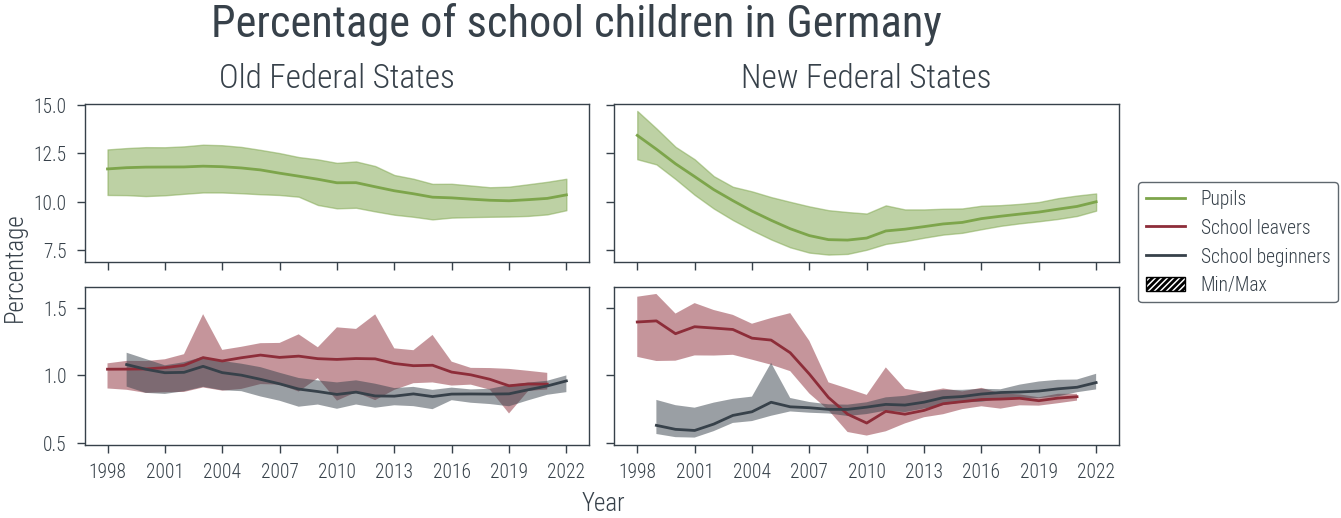

In [195]:
# Plot the data
# Settigns
fig, axs = plt.subplots(2, 2, sharex='all', sharey='row')
all = students_per_state[students_per_state["Gender"] == "all"]
federal_states= {
    "Old Federal States": ["Schleswig-Holstein", "Niedersachsen", "Bremen", "Hamburg", "Nordrhein-Westfalen", "Hessen", "Rheinland-Pfalz", "Saarland", "Baden-Württemberg", "Bayern"],
    "New Federal States": ["Mecklenburg-Vorpommern", "Brandenburg", "Berlin", "Sachsen", "Sachsen-Anhalt", "Thüringen"]
}

# TODO: Move this into plotting
def generate_group(df, group):
    g = df[df["Federal State"].isin(group)]
    
    # Aggregate the data
    group_agg = g.groupby(["Year", "Type"]).apply(lambda x: x["Percentage"].mean()).reset_index().rename(columns={0: "Percentage"})
    group_min = g.groupby(["Year", "Type"]).apply(lambda x: x["Percentage"].min()).reset_index().rename(columns={0: "Percentage"})
    group_max = g.groupby(["Year", "Type"]).apply(lambda x: x["Percentage"].max()).reset_index().rename(columns={0: "Percentage"})
    
    return group_min, group_agg, group_max
    
# Plot pupils
for g_index, group in enumerate(federal_states.values()):
    ax = axs[0][g_index]
    group_min, group_agg, group_max = generate_group(all, group)
    
    # Plot pupils
    ax.plot(group_agg[group_agg["Type"] == "Pupils"]["Year"], group_agg[group_agg["Type"] == "Pupils"]["Percentage"], label="Pupils", color=rgb.tue_green)
    ax.fill_between(group_agg[group_agg["Type"] == "Pupils"]["Year"], group_min[group_min["Type"] == "Pupils"]["Percentage"], group_max[group_max["Type"] == "Pupils"]["Percentage"], color=rgb.tue_green, alpha=0.5)
    ax.set_title(list(federal_states.keys())[g_index], fontsize=12)
    ax.set_xticks(np.arange(group_agg["Year"].min(), group_agg["Year"].max() + 1, 3))

# Plot Leavers and beginners
for g_index, group in enumerate(federal_states.values()):
    ax = axs[1][g_index]
    
    group_min, group_agg, group_max = generate_group(all, group)
    
    # Plot school beginners and leavers
    ax.plot(group_agg[group_agg["Type"] == "School leavers (graduates and dropouts)"]["Year"], group_agg[group_agg["Type"] == "School leavers (graduates and dropouts)"]["Percentage"], label="School leavers")
    ax.fill_between(group_agg[group_agg["Type"] == "School leavers (graduates and dropouts)"]["Year"], group_min[group_min["Type"] == "School leavers (graduates and dropouts)"]["Percentage"], group_max[group_max["Type"] == "School leavers (graduates and dropouts)"]["Percentage"], alpha=0.5)
    
    ax.plot(group_agg[group_agg["Type"] == "School beginners"]["Year"], group_agg[group_agg["Type"] == "School beginners"]["Percentage"], label="School beginners")
    ax.fill_between(group_agg[group_agg["Type"] == "School beginners"]["Year"], group_min[group_min["Type"] == "School beginners"]["Percentage"], group_max[group_max["Type"] == "School beginners"]["Percentage"], alpha=0.5)
    
    ax.set_xticks(np.arange(group_agg["Year"].min(), group_agg["Year"].max() + 1, 3))

fig.text(0.525, -0.04, 'Year', ha='center')
fig.text(-0.02, 0.45, 'Percentage', va='center', rotation='vertical')

# Build legend
labels = []
handles = []
for i, ax in enumerate(axs.flat):
    if i%2 == 0:
        continue
    
    h, l = ax.get_legend_handles_labels()
    labels.extend(l)
    handles.extend(h)
    
legend_proxy = plt.Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='black', hatch='///////////', label='Min/Max')
handles.append(legend_proxy)
labels.append('Min/Max')
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.2, 0.5))

# Add title
fig.suptitle("Percentage of school children in Germany", fontsize=16)
fig.show()

As we can see, the number of students is increasing in every federal state. The most in the new federal states.